<a href="https://colab.research.google.com/github/RohithOgirala/CustomerSegmentation/blob/main/CustomerSegmentation_KNearest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Model Trainig

In [8]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [9]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [10]:
from sklearn.cluster import KMeans

In [11]:
k_means=KMeans()
k_means.fit(X)

KMeans()

In [12]:
k_means=KMeans()
k_means.fit_predict(X)

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 7, 4, 7, 7,
       2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 5, 0, 5, 6, 5, 6, 5,
       0, 5, 6, 5, 6, 5, 6, 5, 6, 5, 0, 5, 6, 5, 0, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 0, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 1, 5, 1, 5, 1, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [13]:
wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [14]:
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 82472.19413919412,
 44454.47647967972,
 37271.88623658948,
 31648.55613774522,
 26436.872835497845,
 23968.101433763164,
 20734.480603375952]

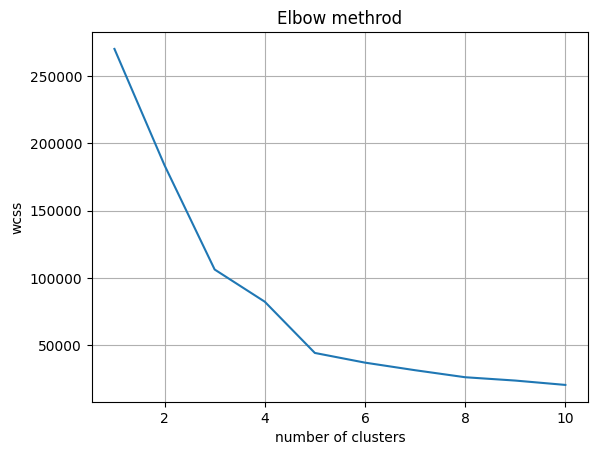

In [15]:
plt.plot(range(1,11),wcss)
plt.title('Elbow methrod')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.grid()
plt.show()

In [16]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]
k_means=KMeans(n_clusters=5,random_state=42)
y_means = k_means.fit_predict(X)

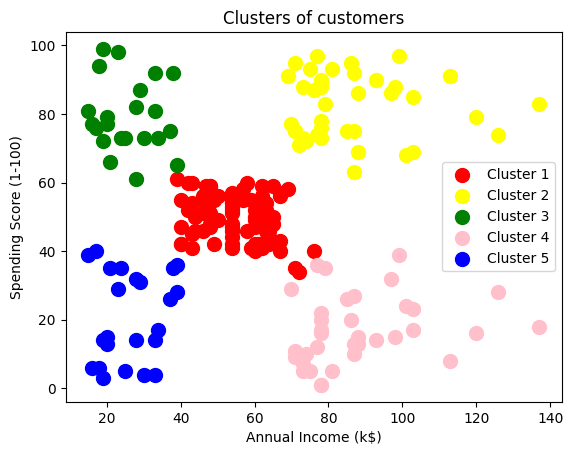

In [28]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='yellow',label='Cluster 2')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c='pink',label='Cluster 4')
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100,c='blue',label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [18]:
k_means.predict([[10,60]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

Save The Model

In [19]:
import  joblib

In [23]:
joblib.dump(k_means,'customer_cluster')

['customer_cluster']

In [24]:
joblib.dump(k_means,'customer_cluster')

['customer_cluster']

In [26]:
model=joblib.load('customer_cluster')

In [27]:
model.predict([[15,39]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)